# BlackFriday 销售数据分析
我们将分析来自于kaggle dataset的美国黑五销售数据，从例如城市、年龄、性别多个角度解读，提供更多有关数据的信息，方便营销团队根据我们的数据和信息准备计划，提高销售表现。
接下来分为以下几个部分：
- 数据总览
- 特征分析
    - 性别特征分析
    - 年龄特征分析
    - 各地区表现
    - 职业特征
    - 客户续航分析
- 总结

## 1. 数据总览

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import random
sns.set_style('darkgrid')
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
sns.set_style({'font.sans-serif':['simhei','Arial']})

In [2]:
#读取数据
df = pd.read_csv('E:/data_files/BlackFriday.csv')

In [3]:
des = df.describe()
des.loc['#unique'] = df.nunique()
display(des)
df1=df.copy()
df1.loc['#unique'] = df.nunique()
df1.tail()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000
#unique,5.891000e+03,21.00000,2.000000,18.000000,17.000000,15.000000,17959.000000


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875
#unique,5891,3623,2,7,21,3,5,2,18,17.0,15.0,17959


**数据概览**

- 数据集有537577行（消费），12列（特征）。
- 总共有**5891名客户，3623种产品**。
- 客户信息有如下：
    - 客户的职业分布在20个类别，用1-20标注；
    - 客户在城市累计居住的年份；
    - 婚姻状况；
    - 客户的年龄，划分为7个年龄段。
- 从mean和中位数对比可以看到，购买额存在极值影响，也符合二八定律。

In [4]:
purchase_des = df.Purchase.describe()
purchase_des.drop(['count','std'],inplace=True)
purchase_des.loc['sum'] = df.Purchase.sum()
purchase_des.loc['mean_by_user'] = df.Purchase.sum() / df.User_ID.nunique()
display(pd.DataFrame(purchase_des).T)

,mean,min,25%,50%,75%,max,sum,mean_by_user
Purchase,9333.859853,185.0,5866.0,8062.0,12073.0,23961.0,5.017668e+09,851751.549482


- 这里对交易金额作进一步数据解读；
- 总销售额为**5017668k**，客户**平均消费851751**，每笔交易**平均消费9333**，单位可能不是美元。

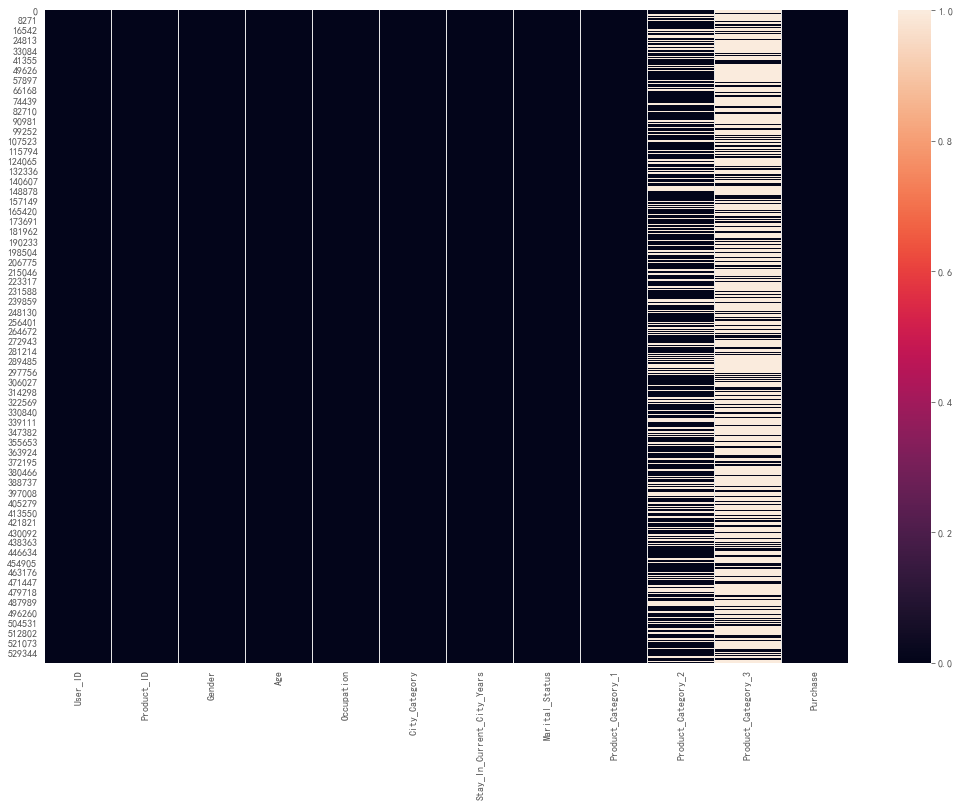

In [5]:
#我们来查看是否有缺失值
plt.figure(figsize=(18,12))
sns.heatmap(df.isnull())

In [6]:
miss_val = df.isnull().sum()
null_perc = (miss_val/len(df))*100
miss_value = pd.DataFrame({'miss_val':miss_val,
                         'null_perc':null_perc })
miss_value.sort_values(by='miss_val',ascending=False).head(2)

,miss_val,null_perc
Product_Category_3,373299,69.441029
Product_Category_2,166986,31.062713


- 从热力图中可以看到，在Product_category_2,Product_category_3中有missing value，这一点后续在产品分析进一步观察。
- 数据统计Product_Category_3**缺失值比率达69%**。

In [7]:
par_des = df[['Product_ID','Gender','Age','Occupation','City_Category','Marital_Status','Product_Category_1']].astype('object').describe()
par_des.loc['percent'] = 100*par_des.loc['freq']/par_des.loc['count']
display(par_des)

,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1
count,537577,537577,537577,537577.00000,537577,537577.000000,537577.000000
unique,3623,2,7,21.00000,3,2.000000,18.000000
top,P00265242,M,26-35,4.00000,B,0.000000,5.000000
freq,1858,405380,214690,70862.00000,226493,317817.000000,148592.000000
percent,0.345625,75.4087,39.9366,13.18174,42.1322,59.120275,27.641064


- 最受欢迎的产品ID是**P00265242**；
- 大多数消费者是**男性** ；
- 最多的交易来源于**26-35年龄段**的群体。

    接下来我们继续深入解读这些结果

## 2.特征分析
### 2.1 性别特征分析

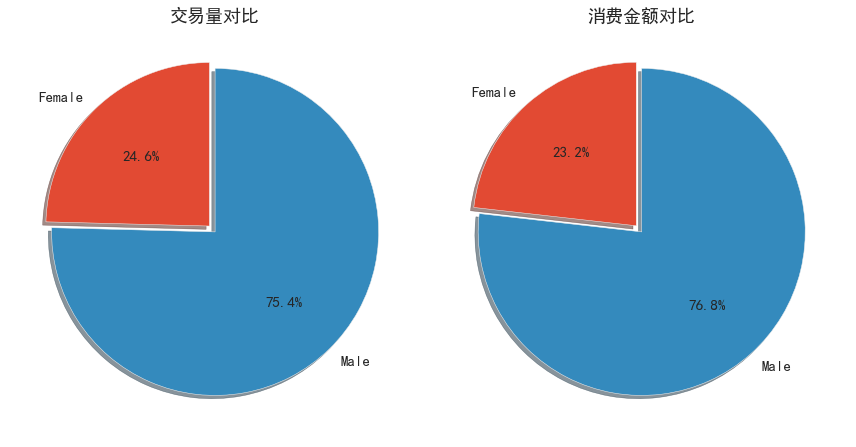

In [8]:
plt.figure(figsize=(12,8))
gender_com = df[['Gender','Purchase']].groupby('Gender').agg(['count','sum'])
params = {
    'labels':gender_com.index.map({'M':'Male','F':'Female'}),
    'autopct':'%1.1f%%',
    'explode':(0.05,0),
    'startangle':90,
    'shadow':True,
    'textprops':{'fontsize':15,'fontweight':'bold'}
}
plt.subplot(121)
plt.pie(gender_com['Purchase']['count'],**params)
plt.title('交易量对比',size=18)
plt.subplot(122)
plt.pie(gender_com['Purchase']['sum'],**params)
plt.title('消费金额对比',size=18)
plt.tight_layout()
plt.show()

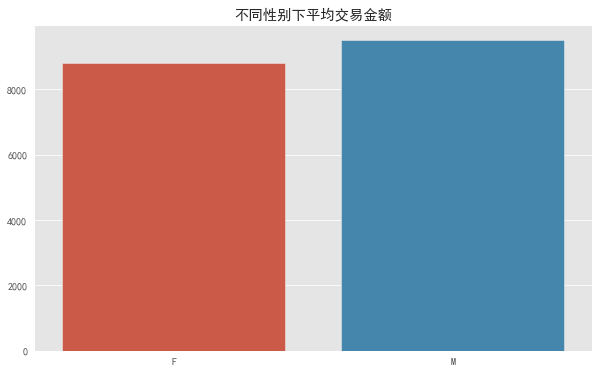

In [9]:
gender_com = df[['Gender','Purchase']].groupby('Gender',as_index=False).agg('mean')
sns.barplot(x='Gender',y='Purchase',data=gender_com)
plt.gcf().set_size_inches(10,6)
plt.xlabel('')
plt.ylabel('')
plt.title('不同性别下平均交易金额')
plt.show()

- 男性在BlackFriday的交易量几乎是女性的三倍
- 同样在交易金额上的对比与交易量相近，从bar图中看到男女的平均购买金额没有显著差别

### 2.2 年龄特征分析

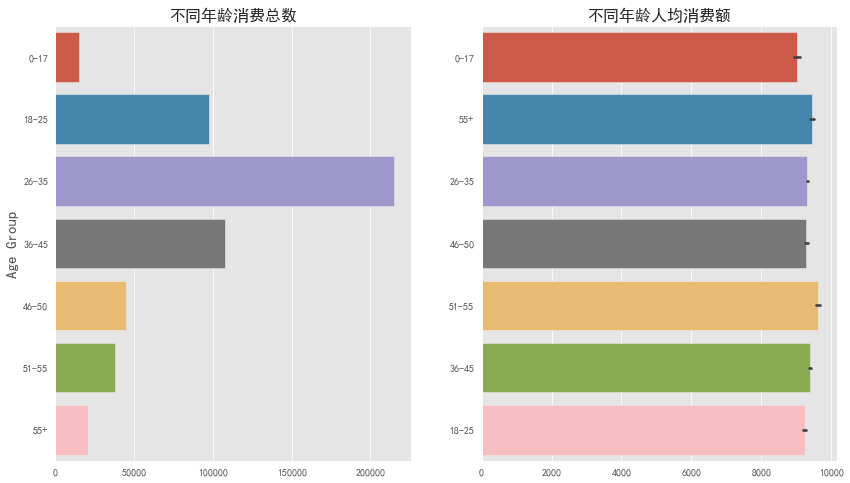

In [10]:
plt.figure(figsize=(14,8))
plt.subplot(121)
sns.countplot(y=df.Age,order=sorted(df.Age.unique()))
plt.xlabel('')
plt.ylabel('Age Group',size=15)
plt.title('不同年龄消费总数',size=16)
plt.subplot(122)
df_age = df[['Age','Purchase']].groupby('Age',as_index=False).agg('mean')
sns.barplot(y=df.Age,x=df.Purchase,data=df_age)
plt.title('不同年龄人均消费额',size=16)
plt.xlabel('')
plt.ylabel('')
plt.show()

- 年龄在26-35间的客户群体贡献了最多的交易量和金额；
- 但是平均表现来说，各年龄段的客户人均消费差异不大。

### 2.3 各地区表现

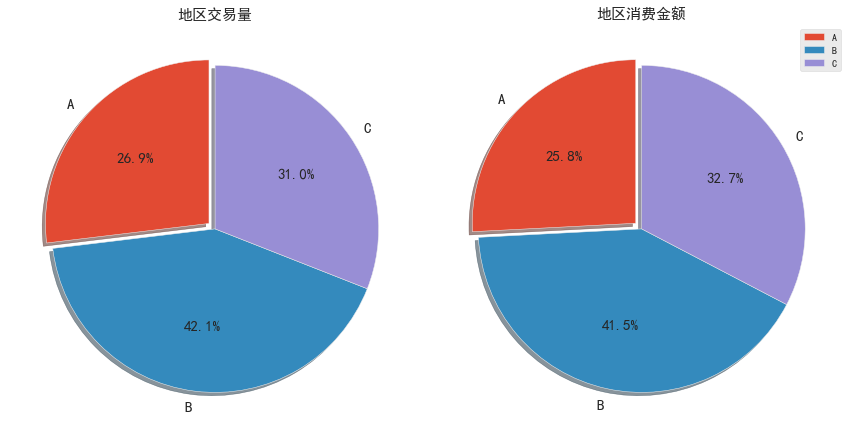

In [11]:
plt.figure(figsize=(12,8))
city_com = df[['City_Category','Purchase']].groupby('City_Category').agg(['count','sum'])
params = {
    'labels':city_com.index.map({'A':'A','B':'B','C':'C'}),
    'autopct':'%1.1f%%',
    'explode':(0.05,0,0),
    'startangle':90,
    'shadow':True,
    'textprops':{'fontsize':15,'fontweight':'bold'}
}
plt.subplot(121)
plt.pie(city_com['Purchase']['count'],**params)
plt.title('地区交易量',size=15)
plt.subplot(122)
plt.pie(city_com['Purchase']['sum'],**params)
plt.title('地区消费金额',size=15)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

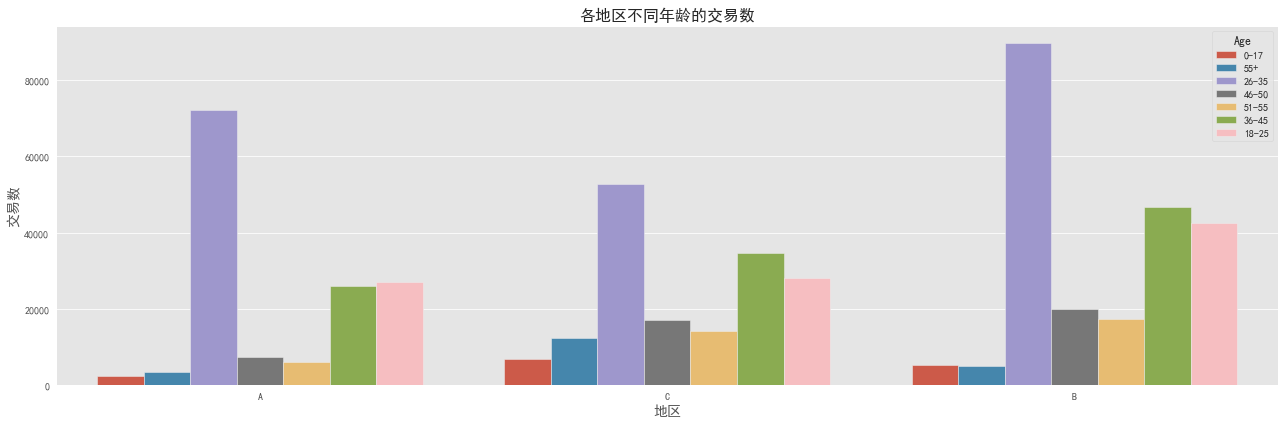

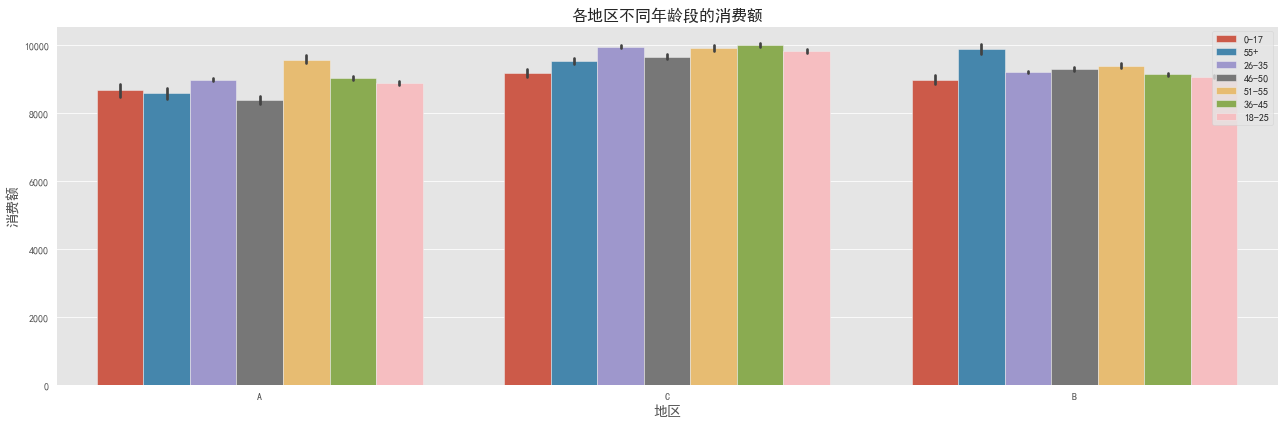

In [12]:
fig,ax1 = plt.subplots(figsize=(18,6))
sns.countplot(df.City_Category,hue=df.Age)
plt.xlabel('地区',size=14)
plt.ylabel('交易数',size=14)
plt.title('各地区不同年龄的交易数',size=16)
plt.tight_layout()
fig,ax2 = plt.subplots(figsize=(18,6))
sns.barplot(x=df.City_Category,y=df.Purchase,hue=df.Age,ax=ax2)
plt.xlabel('地区',size=14)
plt.ylabel('消费额',size=14)
plt.title('各地区不同年龄段的消费额',size=16)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

- 拥有最大量的交易数和消费金额，来自B地区的客户比其他地区的客户的购买力更强，C地区的客户也有良好的表现。
- 值得关注的是26-36岁客户群体在三个城市地区都是消费主力。

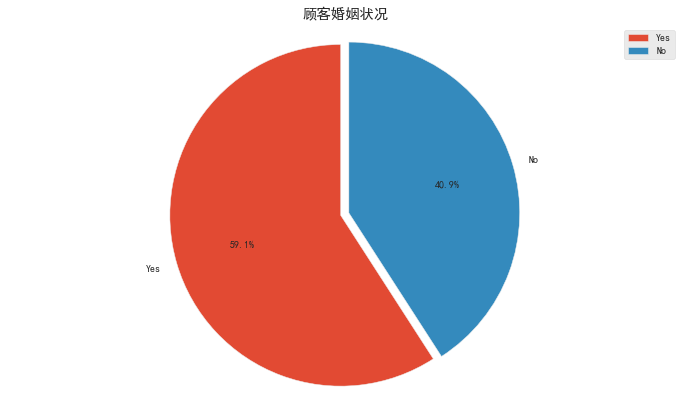

In [13]:
fig1,ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df.Marital_Status.value_counts(),explode=(0.05,0),labels=['Yes','No'],autopct='%1.1f%%',startangle=90)
ax1.set_title('顾客婚姻状况')
ax1.axis('equal')
plt.legend()
plt.show()

- 大部分顾客是已婚的，可以加强在家庭消费方面的策略。

### 2.4 职业特征

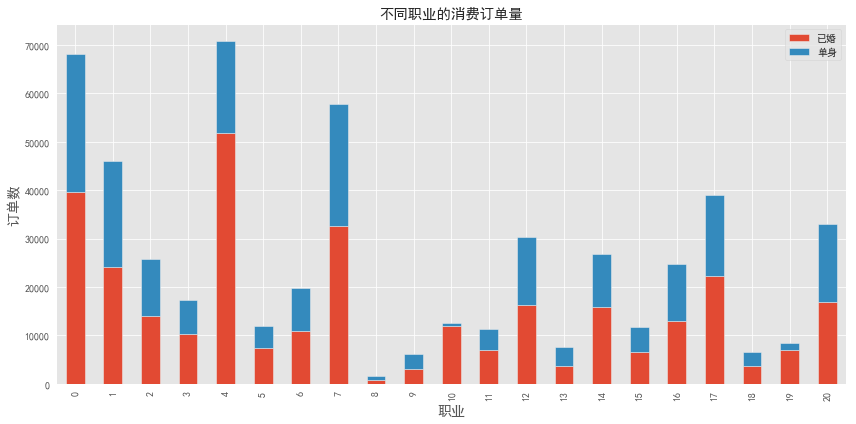

In [14]:
married = df[df.Marital_Status==0]['Occupation'].value_counts(sort=False)
single = df[df.Marital_Status==1]['Occupation'].value_counts(sort=False)
pd.DataFrame({'已婚':married,'单身':single},index=range(0,21)).plot.bar(stacked=True)
plt.gcf().set_size_inches(12,6)
plt.title('不同职业的消费订单量')
plt.xlabel('职业',size=14)
plt.ylabel('订单数',size=14)
plt.tight_layout()
plt.legend()
plt.show()

- 观察到0,4,7这三类职业是消费量最多。
- 接下来我们看看各职业最中意的产品是哪些。


In [15]:
color_mapping = {}
def random_color(val):    
    if val in color_mapping.keys():
        color = color_mapping[val]
    else:
        r = lambda: random.randint(0,255)
        color = 'rgba({}, {}, {}, 0.4)'.format(r(), r(), r())
        color_mapping[val] = color
    return 'background-color: %s' % color

occ_product_gb = df[['Occupation', 'Product_ID', 'Purchase']].groupby(['Occupation', 'Product_ID']).agg('count').rename(columns={'Purchase': 'count'})
occ_product_gb.sort_values(by='count', inplace=True, ascending=False)
result = pd.DataFrame({
    x: list(occ_product_gb.loc[x].index)[:5] for x in range(21)
}, index=['#{}'.format(x) for x in range(1,6)])
display(result.style.applymap(random_color))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
#1,P00265242,P00265242,P00265242,P00265242,P00265242,P00265242,P00265242,P00265242,P00112142,P00034742,P00145042,P00265242,P00057642,P00265242,P00265242,P00025442,P00265242,P00057642,P00265242,P00265242,P00265242
#2,P00110742,P00220442,P00025442,P00117942,P00110742,P00114942,P00058042,P00110742,P00242742,P00117442,P00242742,P00059442,P00265242,P00010742,P00184942,P00110742,P00046742,P00112142,P00010742,P00058042,P00059442
#3,P00025442,P00110742,P00058042,P00025442,P00112142,P00251242,P00110742,P00025442,P00117942,P00265242,P00112142,P00025442,P00112142,P00317842,P00025442,P00265242,P00034742,P00025442,P00058042,P00237542,P00220442
#4,P00057642,P00025442,P00110842,P00110842,P00237542,P00110742,P00031042,P00112142,P00114942,P00000142,P00025442,P00110942,P00025442,P00080342,P00237542,P00110942,P00058042,P00110742,P00080342,P00059442,P00110742
#5,P00112142,P00059442,P00059442,P00110742,P00025442,P00057642,P00255842,P00184942,P00127842,P00102642,P00255842,P00112142,P00237542,P00085242,P00148642,P00059442,P00255842,P00117942,P00184942,P00145042,P00025442


- 首先注意到，P00265242是21种职业中15种最常购买的产品，猜测是一种大众日常消费品，但有趣的是该产品甚至不存在于职业8,10和17的前5种产品中。
- 仔细观察可以看到，职业9中除了P00265242出现在其他大部分前五名中，还有P00034742出现在职业16之外，其他的甚至都不在其他20个职业中，结果前面分析的结果，推测这个职业有一定的独特性。

### 2.5 客户续航分析

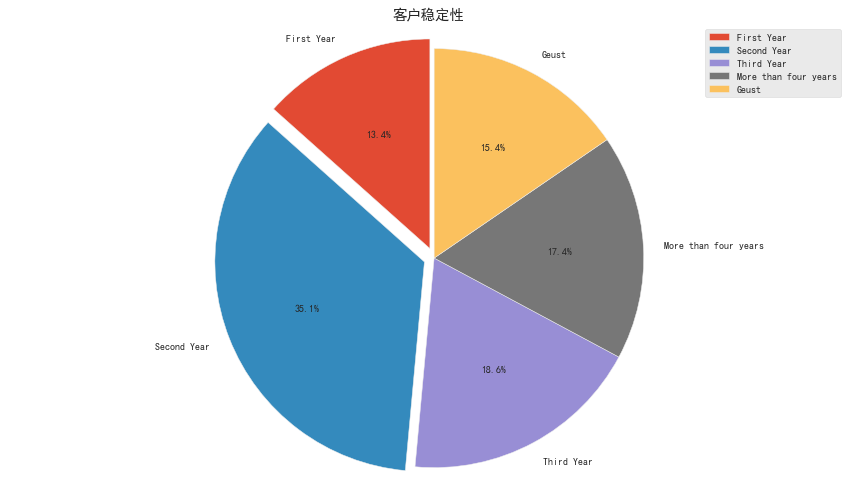

In [16]:
labels = ['First Year','Second Year','Third Year','More than four years','Geust']
fig1,ax1 = plt.subplots(figsize = (12,7))
ax1.pie(df.groupby('Stay_In_Current_City_Years')['Purchase'].sum(),explode=(0.05,0.05,0,0,0),labels=labels,autopct='%1.1f%%',startangle=90)
ax1.set_title('客户稳定性')
ax1.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

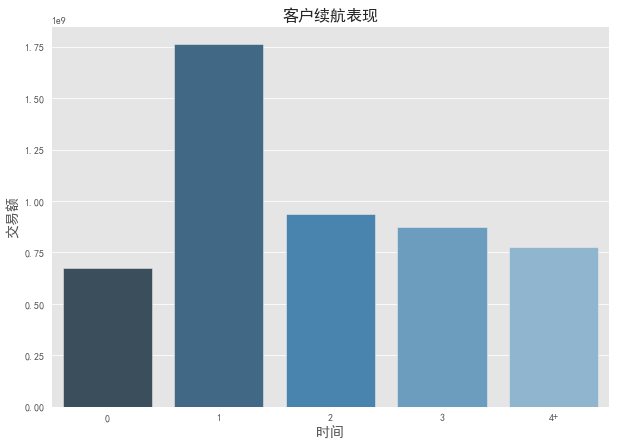

In [17]:
cost_bycity = df.groupby('Stay_In_Current_City_Years').sum()['Purchase']
plt.figure(figsize=(10,7))
sns.barplot(x=cost_bycity.index,y=cost_bycity.values,palette='Blues_d')
plt.xlabel('时间',size=14)
plt.ylabel('交易额',size=14)
plt.title('客户续航表现',size=16)
plt.show()

- 城市的新人口，1年及以下的外来人口占据了比较大的消费金额，这同时也反映城市居住2年以上的人口消费乏力，对产品缺乏热情。

## 3.总结

    我们描述了数据集和特征，做了一些探索性数据分析，从中得到了一些数据集的事实和观点。每个特征之间关系可以做出更多的相关对比分析，本次结果如下：
   - Product Category 1 的销售表现最佳，其中的P00265242是TopSales。
   - B地区的客户群体是主要的目标客户，C地区的表现也必较强劲。
   - 男性是主要的消费群体。
   - 城市新人口的消费更大，需要加强吸引老住户的消费欲望。

作者：JoviDeng